In [83]:
import numpy as np
import pandas as pd
import random
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, precision_score,recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
# loading the data from csv file 
parkinsons_data = pd.read_csv("C:/Users/yukth/Downloads/archive (9)/Dataset (2).csv")

In [9]:
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,NaN,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,NaN,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1.0,0.458359,NaN,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,NaN,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,NaN,0.01309,20.651,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,NaN,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [11]:
# No of cols and rows in the dataset
parkinsons_data.shape

(1195, 24)

In [13]:
#Descriptive information on dataset columns (Checking null values )
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1195 entries, 0 to 1194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1195 non-null   object 
 1   MDVP:Fo(Hz)       1136 non-null   float64
 2   MDVP:Fhi(Hz)      1136 non-null   float64
 3   MDVP:Flo(Hz)      1136 non-null   float64
 4   MDVP:Jitter(%)    1136 non-null   float64
 5   MDVP:Jitter(Abs)  1136 non-null   float64
 6   MDVP:RAP          1136 non-null   float64
 7   MDVP:PPQ          1136 non-null   float64
 8   Jitter:DDP        1136 non-null   float64
 9   MDVP:Shimmer      1136 non-null   float64
 10  MDVP:Shimmer(dB)  1136 non-null   float64
 11  Shimmer:APQ3      1136 non-null   float64
 12  Shimmer:APQ5      1136 non-null   float64
 13  MDVP:APQ          1136 non-null   float64
 14  Shimmer:DDA       1136 non-null   float64
 15  NHR               1136 non-null   float64
 16  HNR               1136 non-null   float64


In [15]:
# as a part of preprocessing 
# Other way of Checking for missing values in each column
parkinsons_data.isnull().sum()

name                 0
MDVP:Fo(Hz)         59
MDVP:Fhi(Hz)        59
MDVP:Flo(Hz)        59
MDVP:Jitter(%)      59
MDVP:Jitter(Abs)    59
MDVP:RAP            59
MDVP:PPQ            59
Jitter:DDP          59
MDVP:Shimmer        59
MDVP:Shimmer(dB)    59
Shimmer:APQ3        59
Shimmer:APQ5        59
MDVP:APQ            59
Shimmer:DDA         59
NHR                 59
HNR                 59
status              59
RPDE                59
DFA                 59
spread1             59
spread2             59
D2                  59
PPE                 59
dtype: int64

In [17]:
# Drop the 'name' column if present
if 'name' in parkinsons_data.columns:
    parkinsons_data.drop('name', axis=1, inplace=True)

In [19]:
parkinsons_data = parkinsons_data[parkinsons_data['status'].notna()]
parkinsons_data['status'] = parkinsons_data['status'].round().astype(int)

In [21]:
parkinsons_data['status']

0       1
1       1
2       1
3       1
4       1
       ..
1190    1
1191    1
1192    1
1193    1
1194    1
Name: status, Length: 1136, dtype: int32

In [23]:
status_counts = parkinsons_data['status'].value_counts()
status_counts

status
1    1089
0      47
Name: count, dtype: int64

In [25]:
# Step 1: Handle missing values using mean imputation
imputer = KNNImputer(n_neighbors=5)
df_imputed_array = imputer.fit_transform(parkinsons_data)

In [27]:
# STEP 4: Convert back to DataFrame (columns are preserved)
df_imputed = pd.DataFrame(df_imputed_array, columns=parkinsons_data.columns)

In [29]:
df_imputed

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,0.000078,0.003700,0.005540,0.011090,0.043740,0.426000,...,0.065450,0.022110,18.984200,1.0,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.094030,0.019290,19.085000,1.0,0.458359,0.734995,-4.075192,0.335590,2.486855,0.368674
2,145.763042,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,0.270914,...,0.046998,0.013090,20.651000,1.0,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,0.297329,...,0.087710,0.013530,22.417006,1.0,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.104700,0.017670,19.649000,1.0,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1131,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,0.265100,...,0.050788,0.021377,21.884979,1.0,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1132,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,0.301784,...,0.049785,0.024169,21.973752,1.0,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1133,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,0.290663,...,0.051215,0.021530,21.615298,1.0,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1134,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,0.289629,...,0.049023,0.026806,21.561977,1.0,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


In [31]:
# getting some statistical measures about the data
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,1079.000000,1080.000000,1081.000000,1079.000000,1083.000000,1079.000000,1085.000000,1079.000000,1079.000000,1080.000000,...,1082.000000,1078.000000,1082.000000,1136.000000,1080.000000,1079.000000,1078.000000,1079.000000,1078.000000,1079.000000
mean,154.285485,196.914610,116.372848,0.006249,0.000044,0.003312,0.003445,0.009925,0.029794,0.282535,...,0.047161,0.024898,21.877976,0.958627,0.498855,0.718281,-5.686216,0.226272,2.381494,0.206936
std,17.158489,36.102956,18.263986,0.002036,0.000014,0.001257,0.001170,0.003768,0.007969,0.081311,...,0.012915,0.016740,1.867603,0.199240,0.043066,0.022980,0.428494,0.035123,0.156084,0.038112
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000960,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.777685,0.006274,1.423287,0.044539
25%,150.593681,189.779526,112.171354,0.005789,0.000041,0.003009,0.003178,0.009075,0.028000,0.264310,...,0.044253,0.020837,21.551163,1.000000,0.489432,0.713714,-5.777980,0.218905,2.352031,0.198873
50%,154.003000,197.287288,116.103671,0.006194,0.000044,0.003278,0.003409,0.009817,0.029598,0.280552,...,0.046729,0.024477,21.913737,1.000000,0.497926,0.718366,-5.681613,0.226548,2.382848,0.206741
75%,157.481457,204.067771,119.336479,0.006567,0.000046,0.003530,0.003620,0.010551,0.031024,0.296660,...,0.049421,0.027685,22.278637,1.000000,0.506658,0.723055,-5.598988,0.232866,2.411111,0.213621
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.839756,0.450493,3.671155,0.527367


In [33]:
# distribution of target Variable
parkinsons_data['status'].value_counts()

status
1    1089
0      47
Name: count, dtype: int64

In [35]:
# grouping the data bas3ed on the target variable
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,179.961844,225.757533,143.981067,0.003936,0.000023,0.001939,0.002094,0.005793,0.017797,0.163652,...,0.013488,0.028289,0.011736,24.699133,0.442783,0.694745,-6.721798,0.157513,2.163227,0.121191
1,153.168042,195.660570,115.173649,0.006345,0.000045,0.003373,0.003501,0.010114,0.030317,0.287824,...,0.024575,0.047961,0.025458,21.755553,0.501237,0.719282,-5.641103,0.229195,2.391444,0.210581


In [37]:
X = parkinsons_data.drop(columns=['status'], axis=1)
Y = parkinsons_data['status']

In [39]:
print(X)

      MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0      119.992000    157.302000     74.997000        0.007840   
1      122.400000    148.650000    113.819000        0.009680   
2             NaN    131.111000    111.555000        0.010500   
3      116.676000    137.871000    111.366000        0.009970   
4      116.014000    141.781000    110.655000        0.012840   
...           ...           ...           ...             ...   
1190   151.028206    179.206312    118.797466        0.006594   
1191   161.752472    211.299774    114.784598        0.006397   
1192   148.323186    194.399282    118.570170        0.006335   
1193   152.106305    209.880095    112.903699        0.005298   
1194   151.964173    211.553642    120.752900        0.005573   

      MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0                  NaN  0.003700  0.005540    0.011090      0.043740   
1             0.000080  0.004650  0.006960    0.013940      0.061340   
2  

In [41]:
X

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
0,119.992000,157.302000,74.997000,0.007840,NaN,0.003700,0.005540,0.011090,0.043740,0.426000,...,NaN,0.065450,0.022110,NaN,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,122.400000,148.650000,113.819000,0.009680,0.000080,0.004650,0.006960,0.013940,0.061340,0.626000,...,0.043680,0.094030,0.019290,19.085000,0.458359,NaN,-4.075192,0.335590,2.486855,0.368674
2,NaN,131.111000,111.555000,0.010500,0.000090,0.005440,0.007810,0.016330,0.052330,NaN,...,0.035900,NaN,0.013090,20.651000,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,116.676000,137.871000,111.366000,0.009970,0.000090,0.005020,0.006980,0.015050,0.054920,NaN,...,0.037720,0.087710,0.013530,NaN,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,116.014000,141.781000,110.655000,0.012840,0.000110,0.006550,0.009080,0.019660,0.064250,0.584000,...,0.044650,0.104700,0.017670,19.649000,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,151.028206,179.206312,118.797466,0.006594,0.000040,0.003458,0.003513,0.008731,0.027186,0.265100,...,0.024836,0.050788,0.021377,21.884979,0.499528,0.727604,-5.772439,0.234236,2.392305,0.210778
1191,161.752472,211.299774,114.784598,0.006397,0.000045,0.003545,0.003017,0.009591,0.028982,0.301784,...,NaN,0.049785,NaN,21.973752,0.499209,0.728558,-5.604039,0.235680,2.362850,0.209570
1192,148.323186,194.399282,118.570170,0.006335,0.000044,0.003483,0.003386,0.008980,0.029598,0.290663,...,0.024838,0.051215,0.021530,21.615298,0.497459,0.717687,-5.770640,0.233789,2.410545,0.223595
1193,152.106305,209.880095,112.903699,0.005298,0.000041,0.002778,0.003506,0.009388,0.029550,0.289629,...,0.025529,0.049023,0.026806,21.561977,0.486495,0.722529,-5.677169,0.236918,2.427505,0.218734


In [43]:
Y

0       1
1       1
2       1
3       1
4       1
       ..
1190    1
1191    1
1192    1
1193    1
1194    1
Name: status, Length: 1136, dtype: int32

In [45]:
#Splitting the data into training and tsting data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [46]:
print(X.shape, X_train.shape, X_test.shape)

(1136, 22) (908, 22) (228, 22)


In [49]:
# Data Standardization
scaler = StandardScaler()

In [51]:
scaler.fit(X_train)

StandardScaler()

In [53]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [55]:
print(X_train)

[[ 0.18748147 -0.28732827 -0.69334535 ... -0.46131583 -0.29317077
   0.30590589]
 [ 0.09427231 -0.39368956 -0.08888054 ... -0.24836327 -0.42446835
   0.23863077]
 [-0.31106478  0.16755161 -0.23965864 ... -0.59526859         nan
   0.07152465]
 ...
 [ 0.03723144 -0.02493368 -0.01048967 ...  0.04802151  0.03854714
  -0.63108328]
 [-0.0237358  -0.20525495 -0.08906997 ...  0.23483256 -0.01131211
  -0.20180466]
 [ 0.40254354  0.2911095   0.04542374 ...  0.05211952 -0.30679915
  -0.15737974]]


In [57]:
# Model Training

In [59]:
model = svm.SVC(kernel='linear')

In [61]:
# Step 1: Find rows without any NaNs
mask = ~np.isnan(X_train).any(axis=1)

# Step 2: Keep only valid rows in X and Y
X_train = X_train[mask]
Y_train= Y_train[mask]

In [63]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [65]:
# Model Evaluation

In [67]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [69]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.9892086330935251


In [71]:
# Step 1: Find rows without any NaNs
mask = ~np.isnan(X_test).any(axis=1)

# Step 2: Keep only valid rows in X and Y
X_test = X_test[mask]
Y_test= Y_test[mask]

In [99]:
# accuracy score on training data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
acc = accuracy_score(Y_test, X_test_prediction)

In [75]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.9873417721518988


In [77]:
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")

[0]
The Person does not have Parkinsons Disease


C:\Users\yukth\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [85]:
f1 = f1_score(Y_test, X_test_prediction)
print("F1 Score: ", f1)

F1 Score:  0.9934640522875817


In [87]:
prec = precision_score(Y_test, X_test_prediction)
print("Precision: ", prec)


Precision:  0.987012987012987


In [89]:
# Recall
rec = recall_score(Y_test, X_test_prediction)
print("Recall: ", rec)

Recall:  1.0


In [91]:
# Full Classification Report
print("Classification Report:")
print(classification_report(Y_test, X_test_prediction))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.67      0.80         3
           1       0.99      1.00      0.99        76

    accuracy                           0.99        79
   macro avg       0.99      0.83      0.90        79
weighted avg       0.99      0.99      0.99        79



In [93]:
# Confusion Matrix
print("Confusion Matrix:")
print(confusion_matrix(Y_test, X_test_prediction))
cm = confusion_matrix(Y_test, X_test_prediction)

Confusion Matrix:
[[ 2  1]
 [ 0 76]]


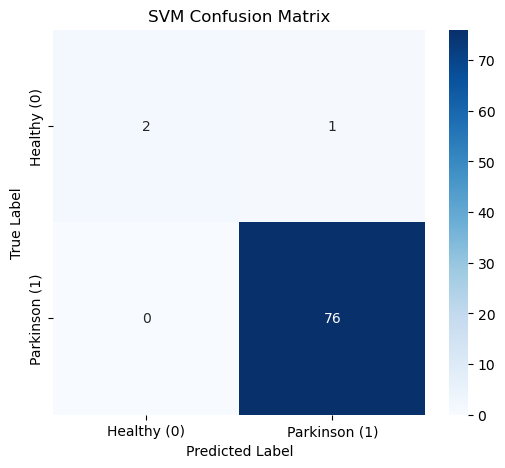

In [95]:
# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Healthy (0)', 'Parkinson (1)'],
            yticklabels=['Healthy (0)', 'Parkinson (1)'])
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

C:\Users\yukth\AppData\Local\Temp\ipykernel_20748\3093207879.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=metrics, palette='viridis')


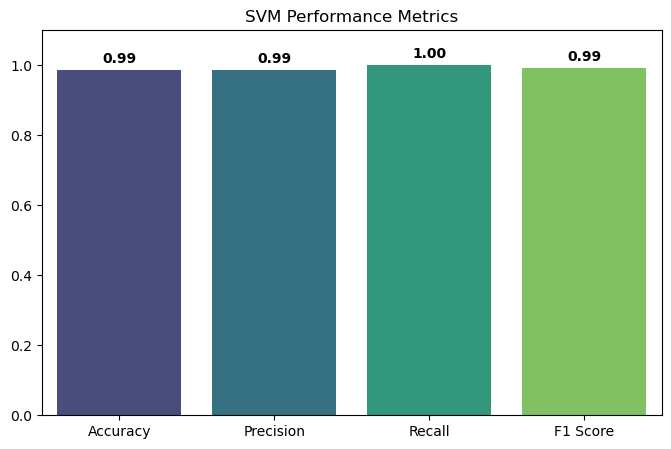

In [101]:
# === Plot Metrics Bar Chart ===
metrics = [acc, prec, rec, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1 Score']

plt.figure(figsize=(8, 5))
sns.barplot(x=labels, y=metrics, palette='viridis')
plt.title("SVM Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', fontweight='bold')
plt.show()